In [3]:
import os
import shutil
import zipfile
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from random import sample

In [ ]:
# Descomprime la base de datos

local_zip = "C:/Users/ferga/Documents/Python/hojas/WeedCountImages_v1.zip"

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('')
zip_ref.close()

In [4]:
# Cuenta el número de imágenes que hay por cada categoría

imag_1_hoja = 0
imag_2_hojas = 0
imag_3_hojas = 0
imag_4_hojas = 0
dir1 = "C:/Users/ferga/Documents/Python/hojas/1_mod"
dir2 = "C:/Users/ferga/Documents/Python/hojas/2_mod"
dir3 = "C:/Users/ferga/Documents/Python/hojas/3_mod"
dir4 = "C:/Users/ferga/Documents/Python/hojas/4_mod"
for path in os.listdir(dir1):
    if os.path.isfile(os.path.join(dir1, path)):
        imag_1_hoja += 1
for path in os.listdir(dir2):
    if os.path.isfile(os.path.join(dir2, path)):
        imag_2_hojas += 1
for path in os.listdir(dir3):
    if os.path.isfile(os.path.join(dir3, path)):
        imag_3_hojas += 1
for path in os.listdir(dir4):
    if os.path.isfile(os.path.join(dir4, path)):
        imag_4_hojas += 1
print('Imagenes de 1 hoja: '+ str(imag_1_hoja))
print('Imagenes de 2 hojas: '+ str(imag_2_hojas))
print('Imagenes de 3 hojas: '+ str(imag_3_hojas))
print('Imagenes de 4 hojas: '+ str(imag_4_hojas))
print('Total: ', imag_1_hoja+imag_2_hojas+imag_3_hojas+imag_4_hojas)


Imagenes de 1 hoja: 1234
Imagenes de 2 hojas: 1234
Imagenes de 3 hojas: 1230
Imagenes de 4 hojas: 1234
Total:  4932


In [6]:
#Cuenta cuantas imágenes servirán para train, para validation y para test, en este caso se ha seguido el criterio 80%-10%-10% respectivamente.

n_imag_train_1 = round(imag_1_hoja*0.8)
n_imag_validation_1 = imag_1_hoja//10
n_imag_test_1 = imag_1_hoja-n_imag_train_1-n_imag_validation_1
print('1 hoja: Train=' + str(n_imag_train_1) + ' Validation=' + str(n_imag_validation_1) + ' Test=' + str(n_imag_test_1))
n_imag_train_2 = round(imag_2_hojas*0.8)
n_imag_validation_2 = imag_2_hojas//10
n_imag_test_2 = imag_2_hojas-n_imag_train_2-n_imag_validation_2
print('2 hojas: Train=' + str(n_imag_train_2) + ' Validation=' + str(n_imag_validation_2) + ' Test=' + str(n_imag_test_2))
n_imag_train_3 = round(imag_3_hojas*0.8)
n_imag_validation_3 = imag_3_hojas//10
n_imag_test_3 = imag_3_hojas-n_imag_train_3-n_imag_validation_3
print('3 hojas: Train=' + str(n_imag_train_3) + ' Validation=' + str(n_imag_validation_3) + ' Test=' + str(n_imag_test_3))
n_imag_train_4 = round(imag_4_hojas*0.8)
n_imag_validation_4 = imag_4_hojas//10
n_imag_test_4 = imag_4_hojas-n_imag_train_4-n_imag_validation_4
print('4 hojas: Train=' + str(n_imag_train_4) + ' Validation=' + str(n_imag_validation_4) + ' Test=' + str(n_imag_test_4))

1 hoja: Train=987 Validation=123 Test=124
2 hojas: Train=987 Validation=123 Test=124
3 hojas: Train=984 Validation=123 Test=123
4 hojas: Train=987 Validation=123 Test=124


In [7]:
#Asignamos cada ruta a variables que luego serán necesarias.

base_dir = "C:/Users/ferga/Documents/Python/hojas"

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

## Directorio con las imagenes de train
# 1 hoja.
train_weed1_dir = os.path.join(train_dir, '1')
# 2 hojas.
train_weed2_dir = os.path.join(train_dir, '2')
# 3 hojas.
train_weed3_dir = os.path.join(train_dir, '3')
# 4 hojas.
train_weed4_dir = os.path.join(train_dir, '4')

## Directorio con las imagenes de validation
# 1 hoja
validation_weed1_dir = os.path.join(validation_dir, '1')
# 2 hojas
validation_weed2_dir = os.path.join(validation_dir, '2')
# 3 hojas
validation_weed3_dir = os.path.join(validation_dir, '3')
# 4 hojas
validation_weed4_dir = os.path.join(validation_dir, '4')

## Directorio con las imagenes de test
# 1 hoja
test_weed1_dir = os.path.join(test_dir,'1')
# 2 hojas
test_weed2_dir = os.path.join(test_dir,'2')
# 3 hojas
test_weed3_dir = os.path.join(test_dir,'3')
# 4 hojas
test_weed4_dir = os.path.join(test_dir,'4')


In [8]:
# Ordena las imágenes de cada categoría en el directorio de train, validation y test.

# 1 hoja
contenido_1 = os.listdir(dir1)
contenido_1_random = sample(contenido_1, len(contenido_1))
for i in range(len(contenido_1_random)):
    if i < n_imag_train_1:
        shutil.copy(os.path.join(dir1, contenido_1_random[i]), train_weed1_dir)
    elif i >= n_imag_train_1 and i < n_imag_train_1+n_imag_validation_1:
        shutil.copy(os.path.join(dir1, contenido_1_random[i]), validation_weed1_dir)
    else:
        shutil.copy(os.path.join(dir1, contenido_1_random[i]), test_weed1_dir)
# 2 hojas
contenido_2 = os.listdir(dir2)
contenido_2_random = sample(contenido_2, len(contenido_2))
for i in range(len(contenido_2_random)):
    if i < n_imag_train_2:
        shutil.copy(os.path.join(dir2, contenido_2_random[i]), train_weed2_dir)
    elif i >= n_imag_train_2 and i < n_imag_train_2+n_imag_validation_2:
        shutil.copy(os.path.join(dir2, contenido_2_random[i]), validation_weed2_dir)
    else:
        shutil.copy(os.path.join(dir2, contenido_2_random[i]), test_weed2_dir)
# 3 hojas
contenido_3 = os.listdir(dir3)
contenido_3_random = sample(contenido_3, len(contenido_3))
for i in range(len(contenido_3_random)):
    if i < n_imag_train_3:
        shutil.copy(os.path.join(dir3, contenido_3_random[i]), train_weed3_dir)
    elif i >= n_imag_train_3 and i < n_imag_train_3+n_imag_validation_3:
        shutil.copy(os.path.join(dir3, contenido_3_random[i]), validation_weed3_dir)
    else:
        shutil.copy(os.path.join(dir3, contenido_3_random[i]), test_weed3_dir)
# 4 hojas
contenido_4 = os.listdir(dir4)
contenido_4_random = sample(contenido_4, len(contenido_4))
for i in range(len(contenido_4_random)):
    if i < n_imag_train_4:
        shutil.copy(os.path.join(dir4, contenido_4_random[i]), train_weed4_dir)
    elif i >= n_imag_train_4 and i < n_imag_train_4+n_imag_validation_4:
        shutil.copy(os.path.join(dir4, contenido_4_random[i]), validation_weed4_dir)
    else:
        shutil.copy(os.path.join(dir4, contenido_4_random[i]), test_weed4_dir)


In [9]:
# Pequeña comprobación de que las fotos están bien ordenadas

# Train
train_weed1_fnames = os.listdir( train_weed1_dir )
print(train_weed1_fnames[:5])
train_weed2_fnames = os.listdir( train_weed2_dir )
print(train_weed2_fnames[:5])
train_weed3_fnames = os.listdir( train_weed3_dir )
print(train_weed3_fnames[:5])
train_weed4_fnames = os.listdir( train_weed4_dir )
print(train_weed4_fnames[:5])


['1.png', '10.png', '100.png', '1000.png', '1001.png']
['103.png', '105.png', '106.png', '109.png', '11.png']
['1.png', '10.png', '100.png', '1001.png', '1004.png']
['1.png', '10.png', '1005.png', '1006.png', '1009.png']


In [11]:
#Comprueba el numero de fotos que hay en cada directorio para verificar que se ha realizado el reparto correctamente

print('total training weed1 images :', len(os.listdir(train_weed1_dir ) ))
print('total training weed2 images :', len(os.listdir(train_weed2_dir ) ))
print('total training weed3 images :', len(os.listdir(train_weed3_dir ) ))
print('total training weed4 images :', len(os.listdir(train_weed4_dir ) ))

print('total validation weed1 images :', len(os.listdir( validation_weed1_dir ) ))
print('total validation weed2 images :', len(os.listdir( validation_weed2_dir ) ))
print('total validation weed3 images :', len(os.listdir( validation_weed3_dir ) ))
print('total validation weed4 images :', len(os.listdir( validation_weed4_dir ) ))

print('total test weed1 images :', len(os.listdir( test_weed1_dir ) ))
print('total test weed2 images :', len(os.listdir( test_weed2_dir ) ))
print('total test weed3 images :', len(os.listdir( test_weed3_dir ) ))
print('total test weed4 images :', len(os.listdir( test_weed4_dir ) ))

total training weed1 images : 987
total training weed2 images : 987
total training weed3 images : 984
total training weed4 images : 987
total validation weed1 images : 123
total validation weed2 images : 123
total validation weed3 images : 123
total validation weed4 images : 123
total test weed1 images : 124
total test weed2 images : 124
total test weed3 images : 123
total test weed4 images : 124


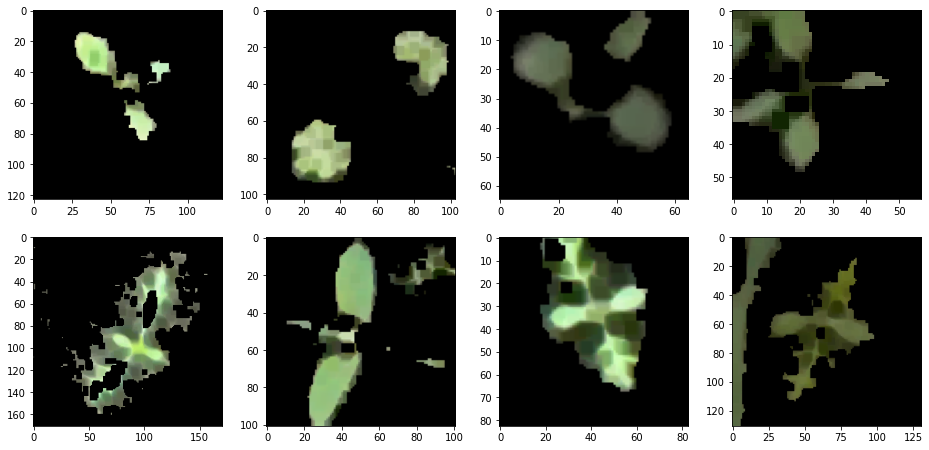

In [12]:
# Representa un ejemplo de las imágenes que se van a tomar para resolver el problema. En este caso se representarán las de dos hojas

# presentaremos images en una configuración de 4x4
nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_weed_pix = [os.path.join(train_weed4_dir, fname) 
                for fname in train_weed4_fnames[ pic_index-8:pic_index] 
               ]

for i, img_path in enumerate(next_weed_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()

In [15]:
#Creación de la CNN

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 256)      

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [18]:
train_datagen = ImageDataGenerator(
      rescale=1.0/255.,
      rotation_range=60,
      horizontal_flip=True,
      fill_mode='nearest'
      )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [19]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         shuffle=False,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 3945 images belonging to 4 classes.
Found 492 images belonging to 4 classes.
Found 495 images belonging to 4 classes.


In [20]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

197
24


In [21]:
history = model.fit(
    train_generator, 
    steps_per_epoch= steps_per_epoch,
    epochs=150,
    validation_data=validation_generator,
    validation_steps= validation_steps,
    verbose=1)

Epoch 1/150
197/197 [==============================] - 37s 174ms/step - loss: 1.3803 - accuracy: 0.2935 - val_loss: 1.3754 - val_accuracy: 0.3229
Epoch 2/150
197/197 [==============================] - 26s 130ms/step - loss: 1.3607 - accuracy: 0.3511 - val_loss: 1.3562 - val_accuracy: 0.3604
Epoch 3/150
197/197 [==============================] - 27s 137ms/step - loss: 1.3337 - accuracy: 0.3654 - val_loss: 1.3304 - val_accuracy: 0.3167
Epoch 4/150
197/197 [==============================] - 26s 134ms/step - loss: 1.3007 - accuracy: 0.3921 - val_loss: 1.2997 - val_accuracy: 0.3500
Epoch 5/150
197/197 [==============================] - 23s 119ms/step - loss: 1.2640 - accuracy: 0.4163 - val_loss: 1.2326 - val_accuracy: 0.4625
Epoch 6/150
197/197 [==============================] - 24s 121ms/step - loss: 1.2314 - accuracy: 0.4341 - val_loss: 1.1907 - val_accuracy: 0.4875
Epoch 7/150
197/197 [==============================] - 23s 119ms/step - loss: 1.1822 - accuracy: 0.4698 - val_loss: 1.2074 -

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

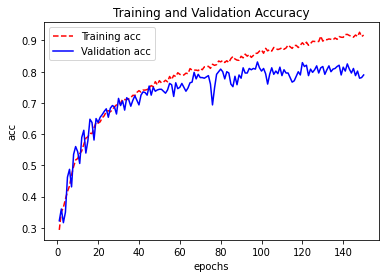

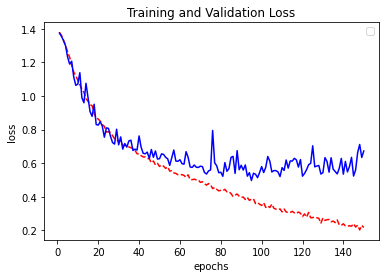

<Figure size 432x288 with 0 Axes>

In [22]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [23]:
test_lost, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

25/25 [==============================] - 2s 99ms/step - loss: 0.5609 - accuracy: 0.8061 0s - loss: 0.5603 - accura
Test Accuracy: 0.8060606122016907


In [24]:
# Guardar el modelo
model.save('CH_V_4hojas_cv.h5')

In [11]:
# Cargar modelo
model = tf.keras.models.load_model('CH_V_2hojas.h5')

In [ ]:
# predicting images

path='hojas/test/1/829.png'
img=image.load_img(path, target_size=(150, 150))
  
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images, batch_size=10)
  
print(classes[0])
  
plt.imshow(img)  
plt.show()

if classes[0,0] == 1:
    print("1 hoja")
if classes[0,1] == 1:
    print("2 hojas")